In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read datasets**

In [2]:
import pandas as pd
test_identity = pd.read_csv("input/test_identity.csv")
test_transaction = pd.read_csv("input/test_transaction.csv")
train_identity = pd.read_csv("input/train_identity.csv")
train_transaction = pd.read_csv("input/train_transaction.csv")

**Fill numeric column's empty values with mean value - we select all cols except the ones mentioned above**

In [3]:
#train_transaction[train_transaction.columns[~train_transaction.columns.isin(['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'
#])]].fillna(\
#        train_transaction[train_transaction.columns[~train_transaction.columns.isin(['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'
#])]].mode().iloc[0], inplace = True)

categ = ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'
]
for column in train_transaction:
    if column not in categ:
        train_transaction.loc[:, (column)].fillna(train_transaction[column].mode().iloc[0], inplace = True)

**Fill in categorical column's empty values with "unknown" value after transforming them into categorical columns**

In [4]:
train_transaction[['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'
]].fillna("unknown").astype('category')

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,13926,unknown,150,discover,142,credit,315,87,unknown,unknown,T,T,T,M2,F,T,unknown,unknown,unknown
1,W,2755,404,150,mastercard,102,credit,325,87,gmail.com,unknown,unknown,unknown,unknown,M0,T,T,unknown,unknown,unknown
2,W,4663,490,150,visa,166,debit,330,87,outlook.com,unknown,T,T,T,M0,F,F,F,F,F
3,W,18132,567,150,mastercard,117,debit,476,87,yahoo.com,unknown,unknown,unknown,unknown,M0,T,F,unknown,unknown,unknown
4,H,4497,514,150,mastercard,102,credit,420,87,gmail.com,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,W,6550,unknown,150,visa,226,debit,272,87,unknown,unknown,T,T,T,M0,T,F,F,F,T
590536,W,10444,225,150,mastercard,224,debit,204,87,gmail.com,unknown,T,F,F,M0,F,T,F,F,F
590537,W,12037,595,150,mastercard,224,debit,231,87,gmail.com,unknown,T,F,F,unknown,unknown,T,unknown,unknown,unknown
590538,W,7826,481,150,mastercard,224,debit,387,87,aol.com,unknown,T,T,T,M0,F,T,unknown,unknown,unknown


**Add One Hot Encoding for category columns**

In [5]:
# concat existing dataframe with the new columns one-hot encoded
train_transaction = pd.concat([train_transaction,pd.get_dummies(train_transaction[['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'
]])],axis=1)

# now drop the original columns as we don't need them anymore
train_transaction.drop(['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9'
],axis=1, inplace=True)

**Split train data in train and "test" - 70-30**

In [6]:
train = train_transaction[:415000]
test  = train_transaction[415000:]

#x_train = train[['TransactionID','TransactionAmt','card1','card2','card3','card4','card5','card6']]
x_train_temp = train.drop('isFraud', axis = 1 )
y_train = train.isFraud

#x_test = test[['TransactionID','TransactionAmt','card1','card2','card3','card4','card5','card6']]
x_test_temp = test.drop('isFraud', axis = 1 )
y_test = test.isFraud

**Standardize the data before applying PCA**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scalled = scaler.fit_transform(x_train_temp)
x_test_scalled = scaler.fit_transform(x_test_temp)

**We keep 95% of the variance and fit for training set**

In [8]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

pca.fit(x_train_scalled)

x_train = pca.transform(x_train_scalled)
x_test = pca.transform(x_test_scalled)

**Choosing somewhere around 230 components would preserve around 99% of the total variance**

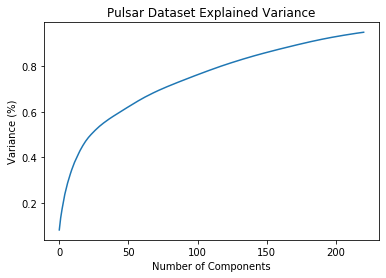

In [15]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [17]:
pca = PCA(n_components=230)

pca.fit(x_train_scalled)

x_train = pca.transform(x_train_scalled)
x_test = pca.transform(x_test_scalled)